<a href="https://colab.research.google.com/github/MartaCampagnoli/MLCatsandDogs/blob/main/PreCrossValidationTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
from os import listdir
import pandas as pd
import numpy as np
import cv2
import PIL
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
import random
import pathlib
from skimage.io import imread

import tensorflow as tf
from tensorflow import keras
from keras import models, layers, callbacks, regularizers
from keras.models import Model, Sequential, load_model
from keras.layers import *
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical, load_img, img_to_array
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import  SGD, RMSprop, Adam
from keras.losses import binary_crossentropy
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss, confusion_matrix

!pip install visualkeras
import visualkeras
!pip install wget
import wget 
import zipfile


%load_ext tensorboard



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 4.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=4e8ea5991cc8b34cfbbd22b825de11d5364dbc4e8569d7c5da4cb0b49357d827
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
if not os.path.isfile("cats_vs_dogs.zip"): #importing the dataset
    print("downloading...")
    wget.download("https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download")


downloading...


In [ ]:
if not (os.path.isdir("data") and os.path.isdir("data/Cats") and os.path.isdir("data/Dogs")): #unzipping
    print("extracting...")
    with zipfile.ZipFile("CatsDogs.zip", 'r') as file: file.extractall("./data/")

extracting...


In [ ]:
data_dir = "/content/data/CatsDogs" 
cats_dir = data_dir + '/Cats'
dogs_dir = data_dir + '/Dogs'


In [ ]:
size = (100, 100)
channels = 1
catsdogs = []
categories = ['Cats','Dogs']

def get_data():

    for category in categories:
        path = os.path.join(data_dir, category)

        animalclass = categories.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, size)
                catsdogs.append([new_array, animalclass])
            except:
                pass

get_data()

print(len(catsdogs))

24946


In [ ]:
random.shuffle(catsdogs)
#for sample in catsdogs[:4]:
    #print(sample[1])

In [ ]:
X = []  #creating images and labels list, converting to tensor, splitting the dataset 
y = []

for image, label in catsdogs:
    X.append(image)
    y.append(label)

X = np.array(X).reshape(-1, 100, 100, channels)

size = X.shape[0]
X = tf.convert_to_tensor(X, dtype= tf.float32) / 255.0
Y = tf.reshape(tf.convert_to_tensor(y, dtype=tf.float32), shape = [size, 1])
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
#earlystopping functions, loss, optimizers

#earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        #mode="min", patience=5,
                                        #restore_best_weights=True)

earlystopping2 = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=10,
                                        restore_best_weights=True)

earlystopping3 = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=15,
                                        restore_best_weights=True)
                                         
loss = keras.losses.BinaryCrossentropy()


SGDM = SGD(learning_rate=0.01, momentum=0.9, decay=0.01/50)
RMSProp = RMSprop(learning_rate=0.001)
ADAM = Adam()

In [ ]:
#Training plots
legend_size = 14

def performance_plot(history):
    plt.figure(figsize=(20,8))

    #Loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','val'], fontsize = legend_size)
    plt.grid()

    #Accuracy
    plt.subplot(1,2,2)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.ylabel('accuracy', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','val'], fontsize = legend_size)
    plt.grid()

    plt.show()
     

# ***Training the models without 5-fold cross-validation***





*   ***Stack128: base model, convolutional layers with 32, 64, 128 kernels, 3 optimizers***








Epoch 1/50
312/312 [==============================] - 11s 34ms/step - loss: 0.6885 - binary_accuracy: 0.5403 - val_loss: 0.6788 - val_binary_accuracy: 0.6010
Epoch 2/50
312/312 [==============================] - 10s 33ms/step - loss: 0.6784 - binary_accuracy: 0.5760 - val_loss: 0.7093 - val_binary_accuracy: 0.4992
Epoch 3/50
312/312 [==============================] - 10s 33ms/step - loss: 0.6591 - binary_accuracy: 0.6079 - val_loss: 0.6377 - val_binary_accuracy: 0.6415
Epoch 4/50
312/312 [==============================] - 10s 33ms/step - loss: 0.6295 - binary_accuracy: 0.6479 - val_loss: 0.6039 - val_binary_accuracy: 0.6876
Epoch 5/50
312/312 [==============================] - 10s 33ms/step - loss: 0.5913 - binary_accuracy: 0.6870 - val_loss: 0.6275 - val_binary_accuracy: 0.6429
Epoch 6/50
312/312 [==============================] - 10s 33ms/step - loss: 0.5458 - binary_accuracy: 0.7223 - val_loss: 0.5640 - val_binary_accuracy: 0.7112
Epoch 7/50
312/312 [==============================] 

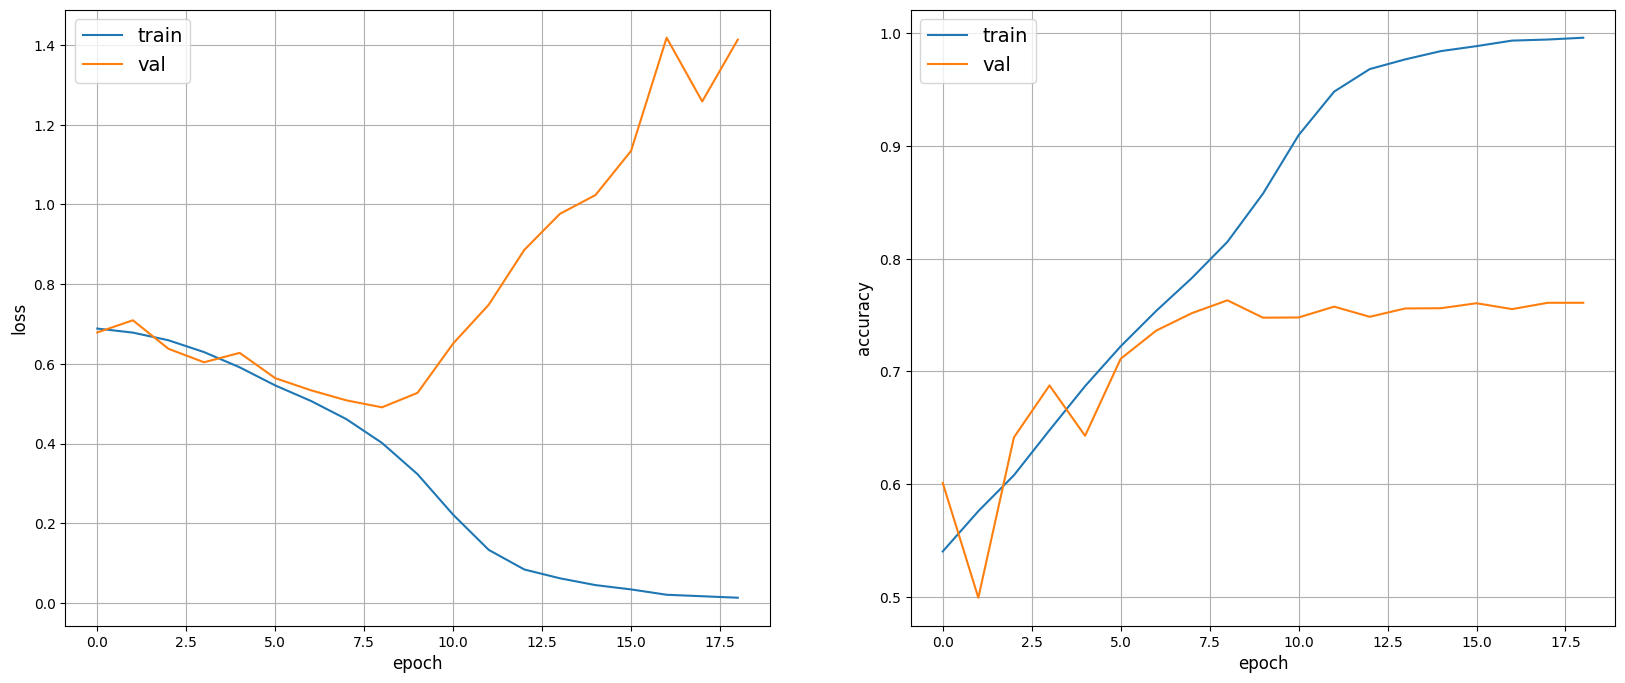

156/156 [==============================] - 1s 6ms/step - loss: 0.4908 - binary_accuracy: 0.7631
Test loss and accuracy: [0.49084059218552045, 0.76312625250501]


In [ ]:
epoch = 50 #SGDM


stack128 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
          tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'), 
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
          tf.keras.layers.Dense(1, activation = 'sigmoid')
      ])

stack128.compile(optimizer = SGDM, loss=loss, metrics=['binary_accuracy'])

history = stack128.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping2])

performance_plot(history)

result = stack128.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)

Epoch 1/50
312/312 [==============================] - 12s 35ms/step - loss: 0.7042 - binary_accuracy: 0.5606 - val_loss: 0.6576 - val_binary_accuracy: 0.6339
Epoch 2/50
312/312 [==============================] - 11s 34ms/step - loss: 0.5922 - binary_accuracy: 0.7041 - val_loss: 0.5568 - val_binary_accuracy: 0.7138
Epoch 3/50
312/312 [==============================] - 11s 34ms/step - loss: 0.4585 - binary_accuracy: 0.7895 - val_loss: 0.4348 - val_binary_accuracy: 0.7974
Epoch 4/50
312/312 [==============================] - 11s 34ms/step - loss: 0.3652 - binary_accuracy: 0.8403 - val_loss: 0.3578 - val_binary_accuracy: 0.8397
Epoch 5/50
312/312 [==============================] - 11s 34ms/step - loss: 0.2983 - binary_accuracy: 0.8751 - val_loss: 0.3665 - val_binary_accuracy: 0.8385
Epoch 6/50
312/312 [==============================] - 11s 34ms/step - loss: 0.2246 - binary_accuracy: 0.9063 - val_loss: 0.2864 - val_binary_accuracy: 0.8758
Epoch 7/50
312/312 [==============================] 

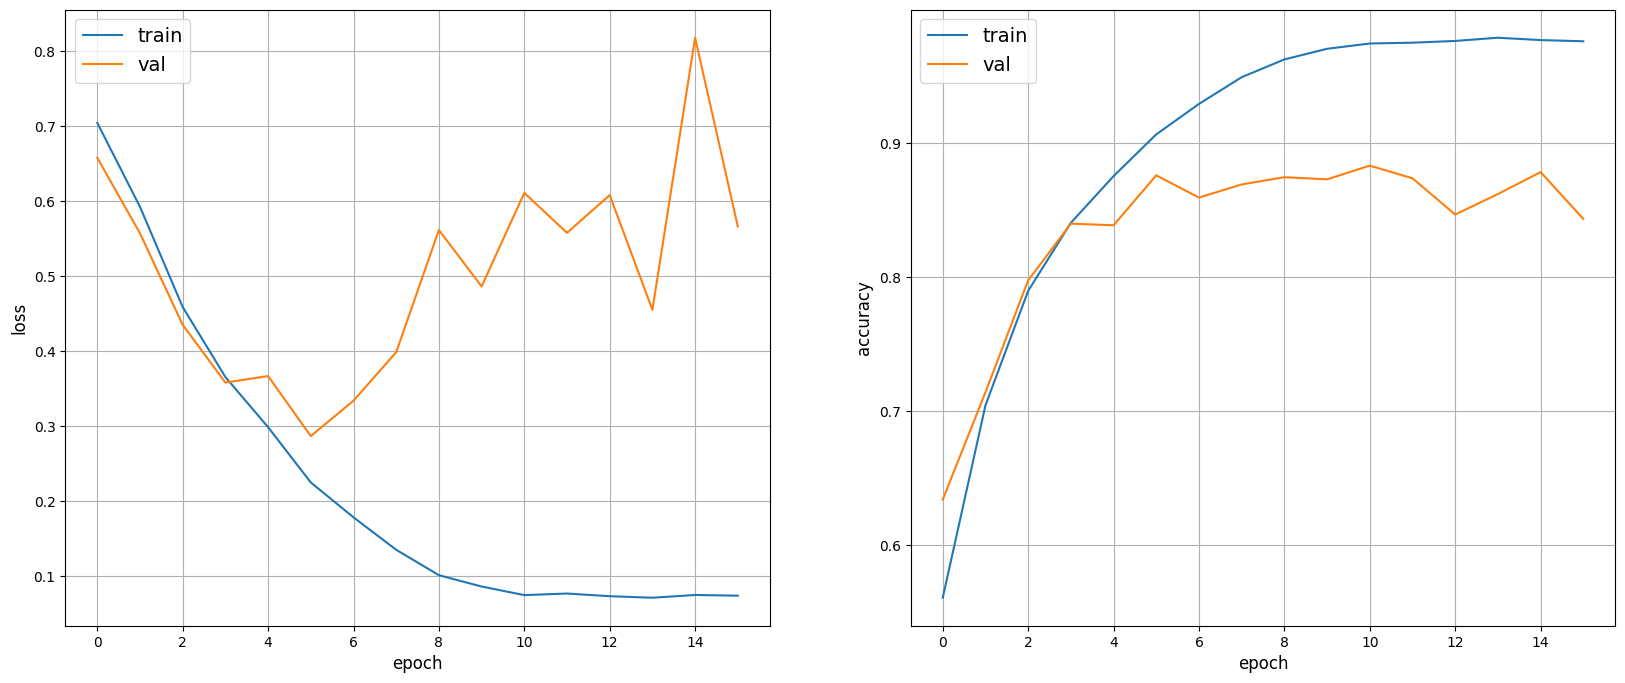

156/156 [==============================] - 1s 6ms/step - loss: 0.2864 - binary_accuracy: 0.8758
Test loss and accuracy: [0.2864090894311278, 0.875751503006012]


In [ ]:
epoch = 50 #RMSPROP

stack128 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
          tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'), 
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
          tf.keras.layers.Dense(1, activation = 'sigmoid')
      ])

stack128.compile(optimizer = RMSProp, loss=loss, metrics=['binary_accuracy'])

history = stack128.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping2])

performance_plot(history)

result = stack128.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)

Epoch 1/50
312/312 [==============================] - 11s 34ms/step - loss: 0.6821 - binary_accuracy: 0.5847 - val_loss: 0.6629 - val_binary_accuracy: 0.6216
Epoch 2/50
312/312 [==============================] - 10s 33ms/step - loss: 0.6140 - binary_accuracy: 0.6659 - val_loss: 0.5799 - val_binary_accuracy: 0.7024
Epoch 3/50
312/312 [==============================] - 10s 33ms/step - loss: 0.5464 - binary_accuracy: 0.7249 - val_loss: 0.5218 - val_binary_accuracy: 0.7397
Epoch 4/50
312/312 [==============================] - 10s 33ms/step - loss: 0.4867 - binary_accuracy: 0.7677 - val_loss: 0.4833 - val_binary_accuracy: 0.7764
Epoch 5/50
312/312 [==============================] - 10s 33ms/step - loss: 0.4290 - binary_accuracy: 0.8020 - val_loss: 0.4478 - val_binary_accuracy: 0.7922
Epoch 6/50
312/312 [==============================] - 10s 33ms/step - loss: 0.3739 - binary_accuracy: 0.8333 - val_loss: 0.4524 - val_binary_accuracy: 0.8006
Epoch 7/50
312/312 [==============================] 

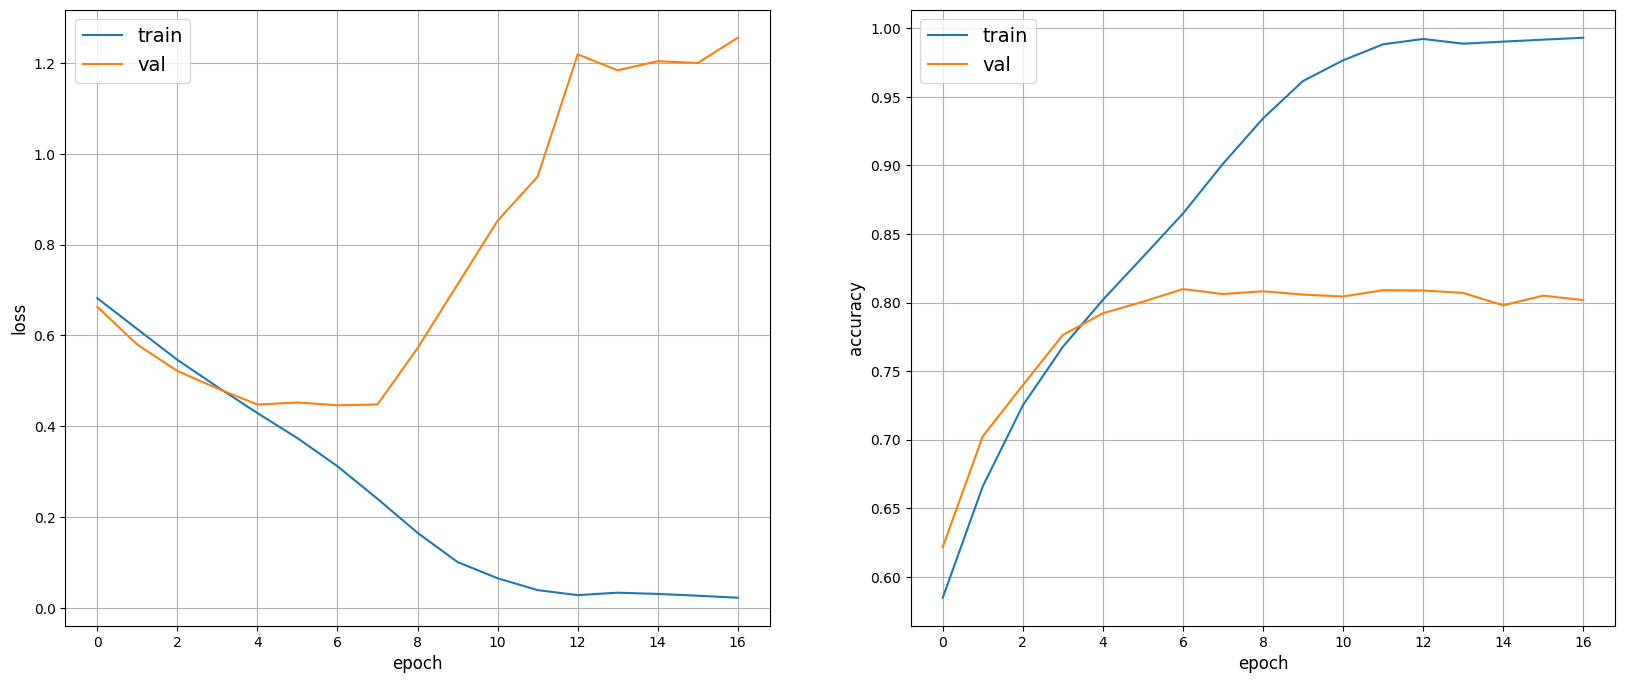

156/156 [==============================] - 1s 6ms/step - loss: 0.4463 - binary_accuracy: 0.8098
Test loss and accuracy: [0.44632187221158975, 0.8098196392785572]


In [ ]:
epoch = 50 #ADAM

stack128 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
          tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
          tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'), 
          tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
          tf.keras.layers.Dense(1, activation = 'sigmoid')
      ])

stack128.compile(optimizer = ADAM, loss=loss, metrics=['binary_accuracy'])

history = stack128.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping2])

performance_plot(history)

result = stack128.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)



*   ***Stack256: base model, convolutional layers with 32, 64, 128, 256 kernels, 2 optimizers***




Epoch 1/50
312/312 [==============================] - 14s 43ms/step - loss: 0.7177 - binary_accuracy: 0.5192 - val_loss: 0.6894 - val_binary_accuracy: 0.5018
Epoch 2/50
312/312 [==============================] - 13s 42ms/step - loss: 0.6827 - binary_accuracy: 0.5861 - val_loss: 0.6493 - val_binary_accuracy: 0.6401
Epoch 3/50
312/312 [==============================] - 13s 42ms/step - loss: 0.5946 - binary_accuracy: 0.7043 - val_loss: 0.5357 - val_binary_accuracy: 0.7529
Epoch 4/50
312/312 [==============================] - 13s 42ms/step - loss: 0.4636 - binary_accuracy: 0.7864 - val_loss: 0.3677 - val_binary_accuracy: 0.8329
Epoch 5/50
312/312 [==============================] - 13s 42ms/step - loss: 0.3763 - binary_accuracy: 0.8352 - val_loss: 0.5010 - val_binary_accuracy: 0.7397
Epoch 6/50
312/312 [==============================] - 13s 42ms/step - loss: 0.2934 - binary_accuracy: 0.8736 - val_loss: 0.2683 - val_binary_accuracy: 0.8910
Epoch 7/50
312/312 [==============================] 

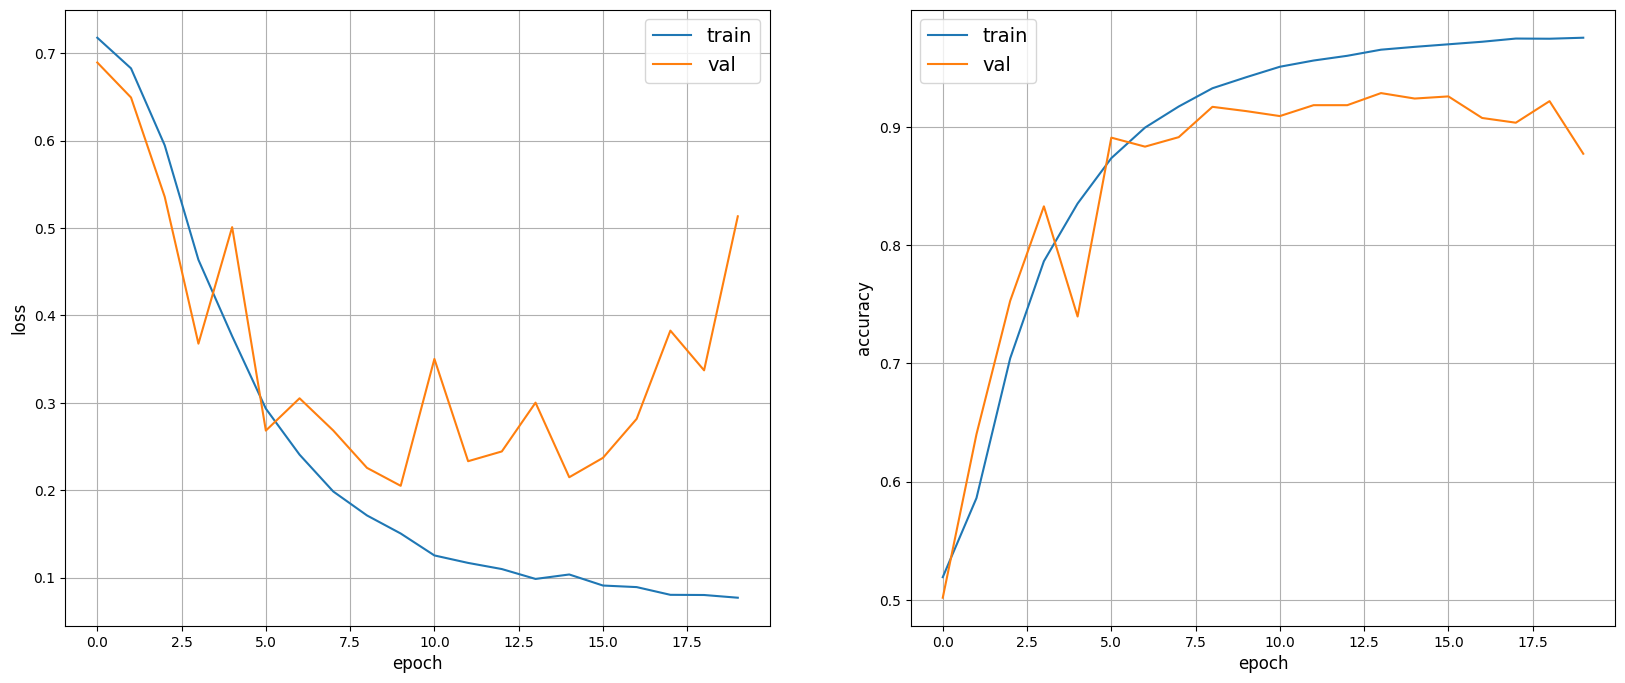

156/156 [==============================] - 1s 7ms/step - loss: 0.2051 - binary_accuracy: 0.9134
Test loss and accuracy: [0.20509783580149826, 0.9134268537074148]


In [ ]:
epoch = 50 #RMSPROP

stack256 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

stack256.compile(optimizer =  RMSProp, loss=loss, metrics=['binary_accuracy'])

history = stack256.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping2])

performance_plot(history)

result = stack256.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)

Epoch 1/50
312/312 [==============================] - 14s 42ms/step - loss: 0.8029 - binary_accuracy: 0.5532 - val_loss: 0.6605 - val_binary_accuracy: 0.6146
Epoch 2/50
312/312 [==============================] - 13s 41ms/step - loss: 0.6695 - binary_accuracy: 0.5902 - val_loss: 0.6601 - val_binary_accuracy: 0.6202
Epoch 3/50
312/312 [==============================] - 13s 41ms/step - loss: 0.6341 - binary_accuracy: 0.6462 - val_loss: 0.5956 - val_binary_accuracy: 0.6910
Epoch 4/50
312/312 [==============================] - 13s 41ms/step - loss: 0.5688 - binary_accuracy: 0.7104 - val_loss: 0.5173 - val_binary_accuracy: 0.7455
Epoch 5/50
312/312 [==============================] - 13s 41ms/step - loss: 0.4988 - binary_accuracy: 0.7605 - val_loss: 0.4676 - val_binary_accuracy: 0.7818
Epoch 6/50
312/312 [==============================] - 13s 41ms/step - loss: 0.4254 - binary_accuracy: 0.8060 - val_loss: 0.4317 - val_binary_accuracy: 0.7982
Epoch 7/50
312/312 [==============================] 

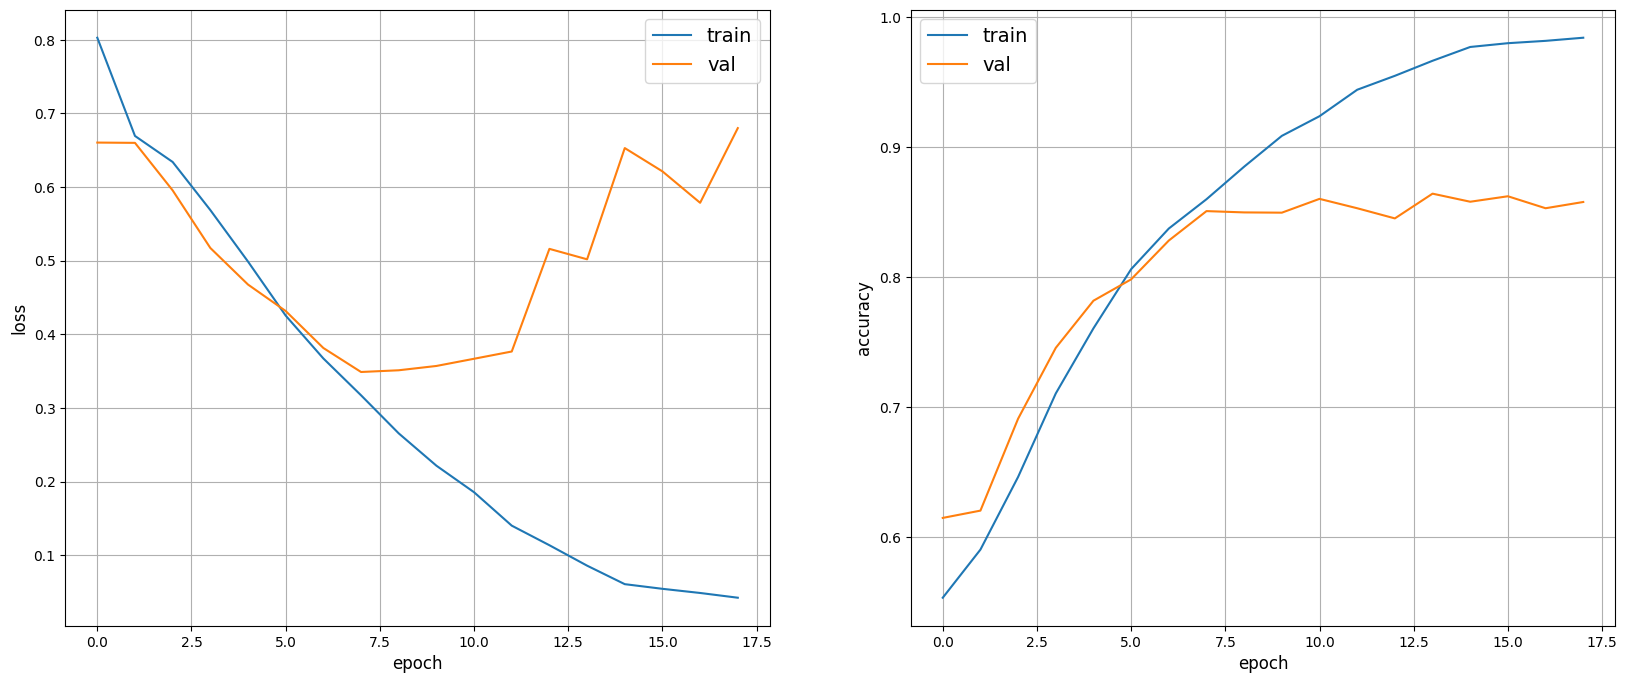

156/156 [==============================] - 1s 8ms/step - loss: 0.3488 - binary_accuracy: 0.8507
Test loss and accuracy: [0.34884050177110404, 0.8507014028056112]


In [ ]:
epoch = 50 #ADAM

stack256 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

stack256.compile(optimizer =  ADAM, loss=loss, metrics=['binary_accuracy'])

history = stack256.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping2])

performance_plot(history)

result = stack256.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)



*   ***Stack512: base model, convolutional layers with 32, 64, 128, 256 kernels, 2 optimizers*** 




Epoch 1/50
312/312 [==============================] - 17s 52ms/step - loss: 0.8021 - binary_accuracy: 0.5034 - val_loss: 0.6932 - val_binary_accuracy: 0.4890
Epoch 2/50
312/312 [==============================] - 16s 51ms/step - loss: 0.7269 - binary_accuracy: 0.5291 - val_loss: 0.6820 - val_binary_accuracy: 0.5896
Epoch 3/50
312/312 [==============================] - 16s 51ms/step - loss: 0.7101 - binary_accuracy: 0.5819 - val_loss: 0.6451 - val_binary_accuracy: 0.6293
Epoch 4/50
312/312 [==============================] - 16s 51ms/step - loss: 0.6151 - binary_accuracy: 0.6748 - val_loss: 0.5502 - val_binary_accuracy: 0.7228
Epoch 5/50
312/312 [==============================] - 16s 51ms/step - loss: 0.5096 - binary_accuracy: 0.7620 - val_loss: 0.5853 - val_binary_accuracy: 0.7549
Epoch 6/50
312/312 [==============================] - 16s 51ms/step - loss: 0.4201 - binary_accuracy: 0.8136 - val_loss: 0.3577 - val_binary_accuracy: 0.8375
Epoch 7/50
312/312 [==============================] 

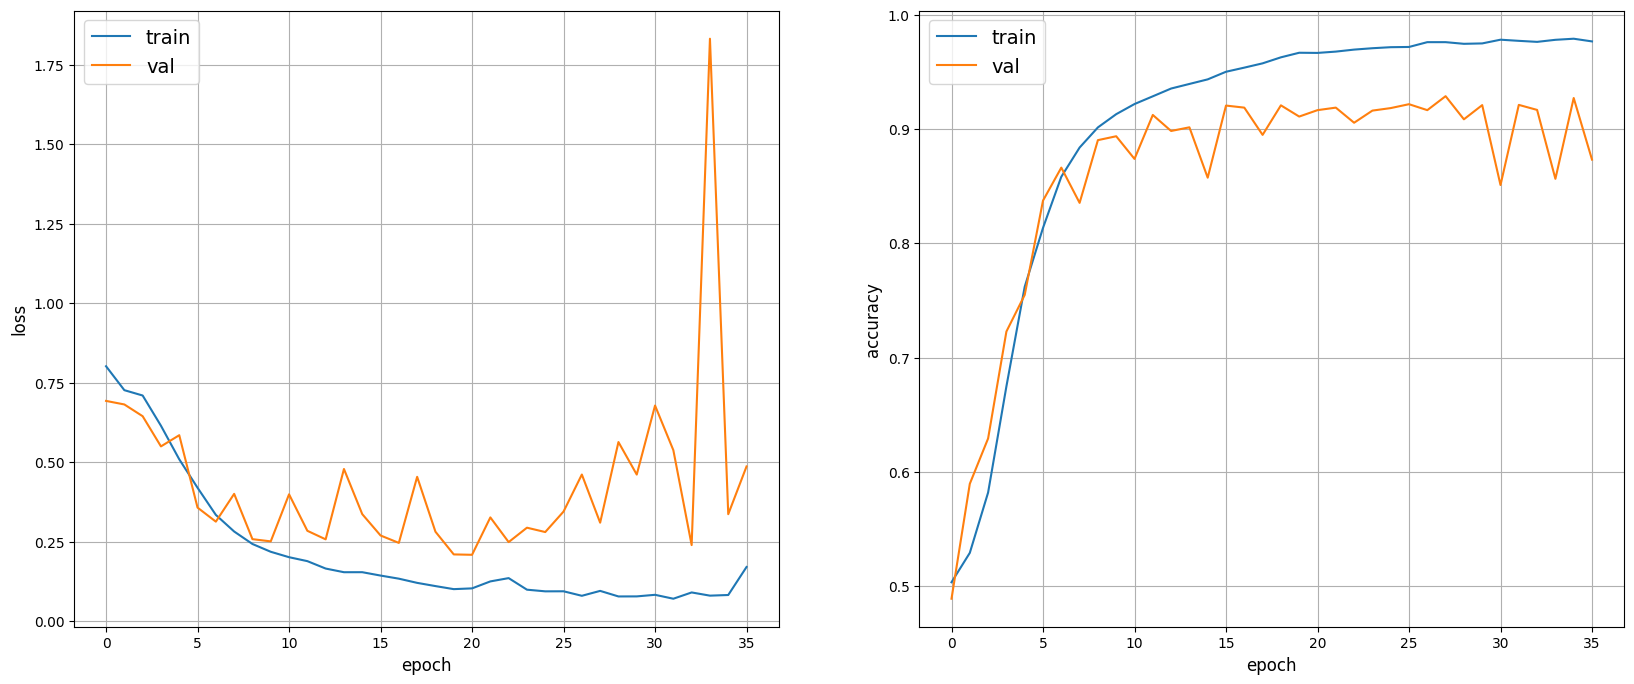

156/156 [==============================] - 1s 9ms/step - loss: 0.2094 - binary_accuracy: 0.9166
Test loss and accuracy: [0.20937130020226988, 0.9166332665330661]


In [ ]:
epoch = 50 #RMSPROP

stack512 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'), 
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

stack512.compile(optimizer =  RMSProp, loss=loss, metrics=['binary_accuracy'])

history = stack512.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping3])

performance_plot(history)

result = stack512.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)

Epoch 1/50
312/312 [==============================] - 17s 51ms/step - loss: 0.7114 - binary_accuracy: 0.5117 - val_loss: 0.6921 - val_binary_accuracy: 0.5561
Epoch 2/50
312/312 [==============================] - 16s 50ms/step - loss: 0.6840 - binary_accuracy: 0.5478 - val_loss: 0.6814 - val_binary_accuracy: 0.5613
Epoch 3/50
312/312 [==============================] - 16s 50ms/step - loss: 0.6820 - binary_accuracy: 0.5567 - val_loss: 0.6719 - val_binary_accuracy: 0.5804
Epoch 4/50
312/312 [==============================] - 16s 50ms/step - loss: 0.6667 - binary_accuracy: 0.5955 - val_loss: 0.6339 - val_binary_accuracy: 0.6467
Epoch 5/50
312/312 [==============================] - 16s 50ms/step - loss: 0.6279 - binary_accuracy: 0.6506 - val_loss: 0.5877 - val_binary_accuracy: 0.6898
Epoch 6/50
312/312 [==============================] - 16s 50ms/step - loss: 0.5614 - binary_accuracy: 0.7117 - val_loss: 0.5008 - val_binary_accuracy: 0.7621
Epoch 7/50
312/312 [==============================] 

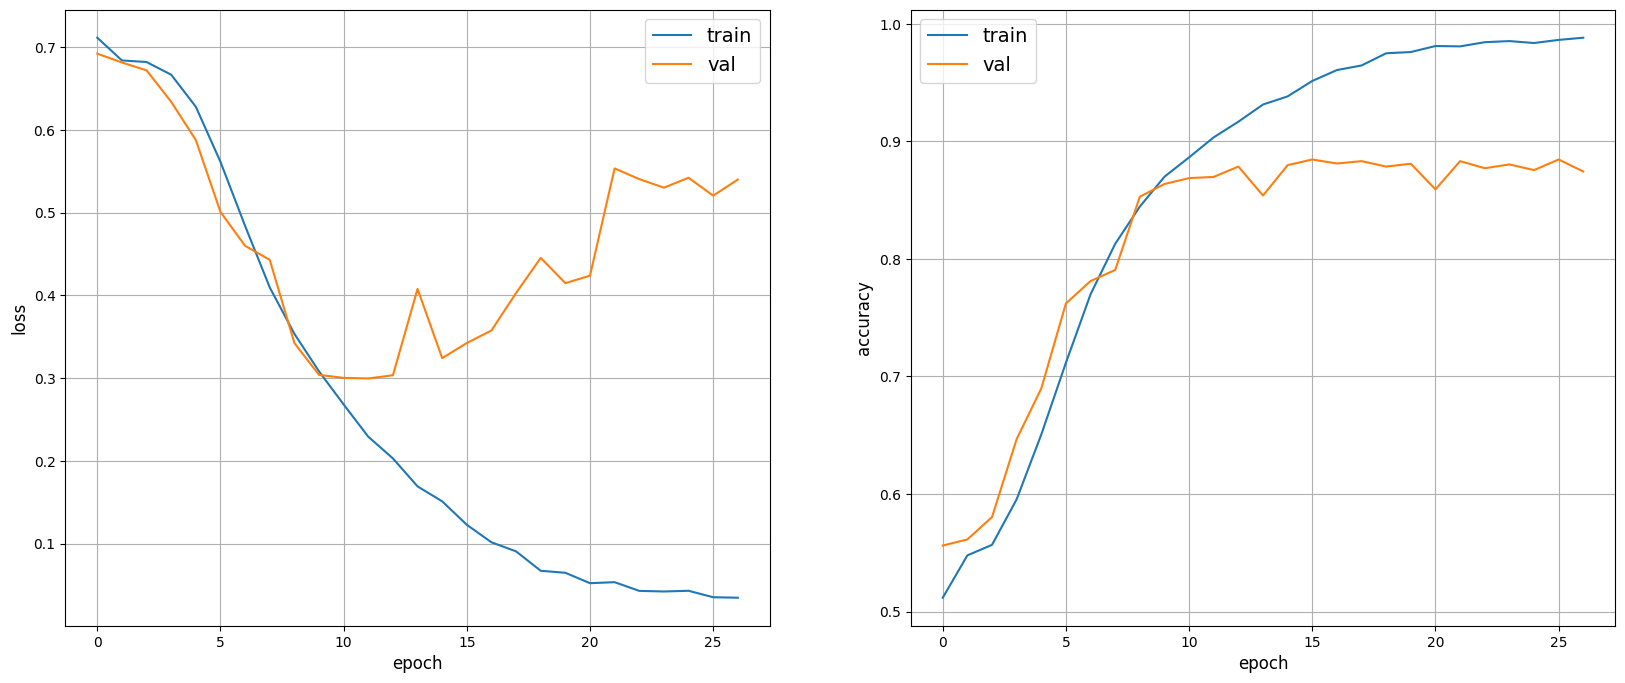

156/156 [==============================] - 1s 9ms/step - loss: 0.2996 - binary_accuracy: 0.8697
Test loss and accuracy: [0.299578964416023, 0.8697394789579158]


In [ ]:

epoch = 50 #ADAM

stack512 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'), 
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

stack512.compile(optimizer = ADAM, loss=loss, metrics=['binary_accuracy'])

history = stack512.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping3])

performance_plot(history)

result = stack512.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)



*   ***Drop256: model using dropout layers and convolutional layers with 32, 64, 128, 256 kernels, 2 Optimizers***



Epoch 1/50
312/312 [==============================] - 44s 94ms/step - loss: 0.7411 - binary_accuracy: 0.5088 - val_loss: 0.6925 - val_binary_accuracy: 0.5351
Epoch 2/50
312/312 [==============================] - 24s 76ms/step - loss: 0.6823 - binary_accuracy: 0.5917 - val_loss: 0.6410 - val_binary_accuracy: 0.6954
Epoch 3/50
312/312 [==============================] - 24s 76ms/step - loss: 0.5766 - binary_accuracy: 0.7095 - val_loss: 0.4946 - val_binary_accuracy: 0.7884
Epoch 4/50
312/312 [==============================] - 23s 73ms/step - loss: 0.4741 - binary_accuracy: 0.7818 - val_loss: 0.3811 - val_binary_accuracy: 0.8335
Epoch 5/50
312/312 [==============================] - 24s 76ms/step - loss: 0.3989 - binary_accuracy: 0.8242 - val_loss: 0.3206 - val_binary_accuracy: 0.8577
Epoch 6/50
312/312 [==============================] - 23s 74ms/step - loss: 0.3454 - binary_accuracy: 0.8485 - val_loss: 0.2801 - val_binary_accuracy: 0.8814
Epoch 7/50
312/312 [==============================] 

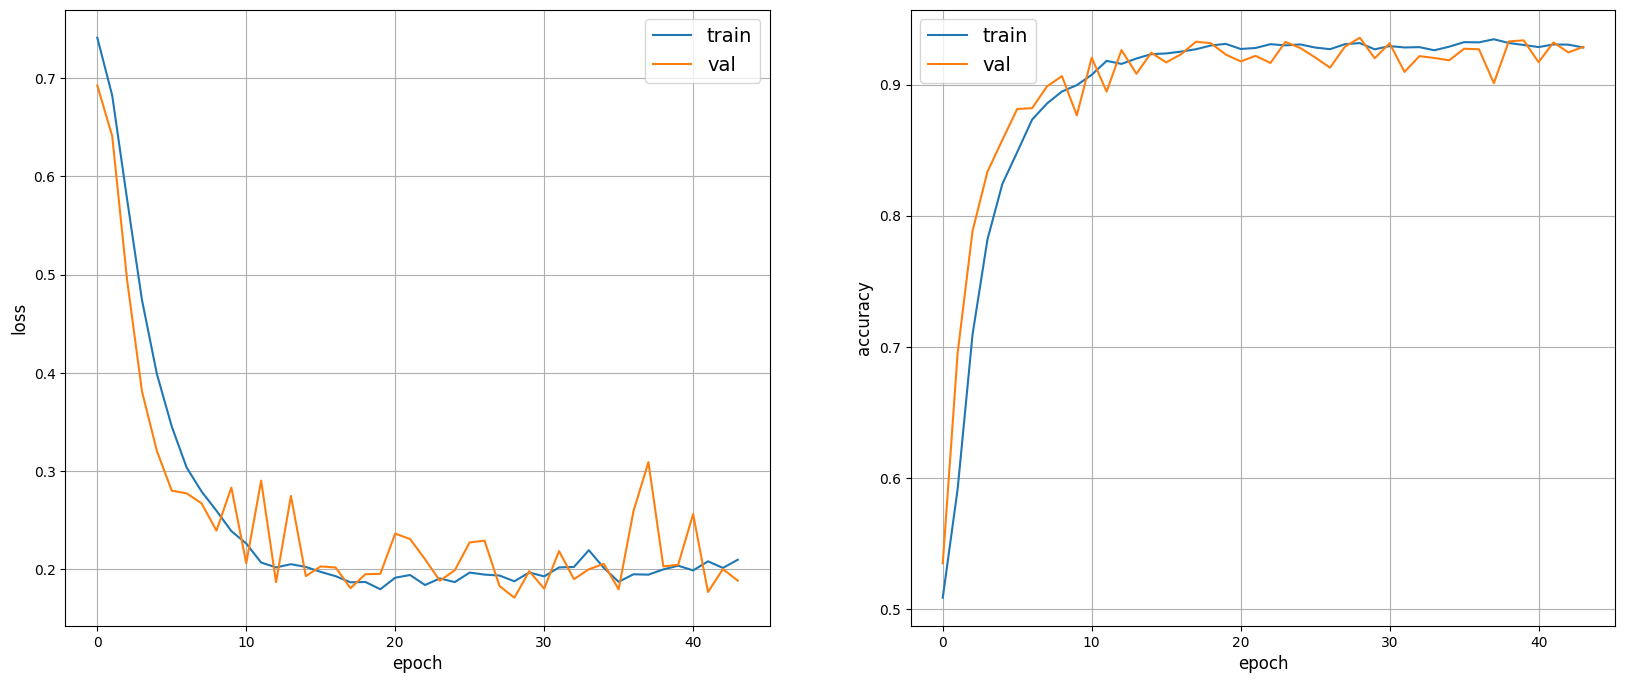

156/156 [==============================] - 4s 19ms/step - loss: 0.1712 - binary_accuracy: 0.9357
test loss, test acc: [0.1712035057025309, 0.9356713426853708]


In [ ]:
epoch = 50 #RMSPROP

drop256 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

drop256.compile(optimizer = RMSProp, loss=loss, metrics=['binary_accuracy'])

history = drop256.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping3])

performance_plot(history)

result = drop256.evaluate(X_test, y_test)
print("test loss, test acc:", result)

Epoch 1/50
312/312 [==============================] - 25s 75ms/step - loss: 0.6911 - binary_accuracy: 0.5216 - val_loss: 0.6765 - val_binary_accuracy: 0.5731
Epoch 2/50
312/312 [==============================] - 23s 73ms/step - loss: 0.6707 - binary_accuracy: 0.5904 - val_loss: 0.6458 - val_binary_accuracy: 0.6351
Epoch 3/50
312/312 [==============================] - 23s 73ms/step - loss: 0.5938 - binary_accuracy: 0.6869 - val_loss: 0.4984 - val_binary_accuracy: 0.7613
Epoch 4/50
312/312 [==============================] - 23s 73ms/step - loss: 0.5065 - binary_accuracy: 0.7578 - val_loss: 0.4928 - val_binary_accuracy: 0.7575
Epoch 5/50
312/312 [==============================] - 23s 73ms/step - loss: 0.4468 - binary_accuracy: 0.7974 - val_loss: 0.4118 - val_binary_accuracy: 0.8150
Epoch 6/50
312/312 [==============================] - 22s 69ms/step - loss: 0.3936 - binary_accuracy: 0.8250 - val_loss: 0.3639 - val_binary_accuracy: 0.8443
Epoch 7/50
312/312 [==============================] 

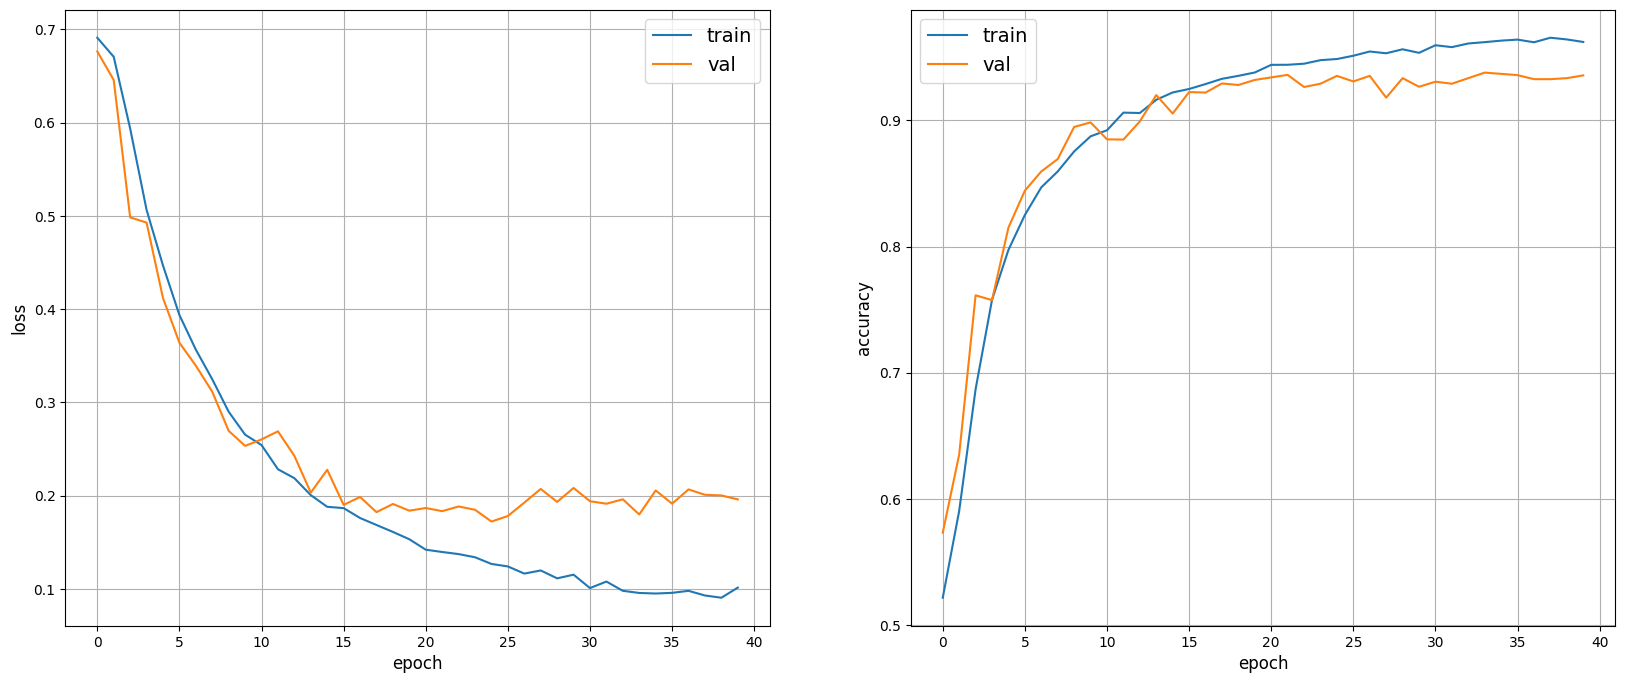

156/156 [==============================] - 2s 11ms/step - loss: 0.1721 - binary_accuracy: 0.9353
test loss, test acc: [0.17209105192976323, 0.9352705410821643]


In [ ]:
epoch = 50 #ADAM

drop256 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

drop256.compile(optimizer = ADAM, loss=loss, metrics=['binary_accuracy'])

history = drop256.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping3])

performance_plot(history)

result = drop256.evaluate(X_test, y_test)
print("test loss, test acc:", result)



*   ***Drop512: model using dropout layers and convolutional layers with 32, 64, 128, 256, 512 kernels, 2 Optimizers***




Epoch 1/50
312/312 [==============================] - 6s 14ms/step - loss: 0.7147 - binary_accuracy: 0.5058 - val_loss: 0.6930 - val_binary_accuracy: 0.5794
Epoch 2/50
312/312 [==============================] - 4s 14ms/step - loss: 0.7133 - binary_accuracy: 0.5574 - val_loss: 0.6464 - val_binary_accuracy: 0.6551
Epoch 3/50
312/312 [==============================] - 4s 13ms/step - loss: 0.6049 - binary_accuracy: 0.6942 - val_loss: 0.7362 - val_binary_accuracy: 0.6984
Epoch 4/50
312/312 [==============================] - 4s 13ms/step - loss: 0.4916 - binary_accuracy: 0.7707 - val_loss: 0.3813 - val_binary_accuracy: 0.8253
Epoch 5/50
312/312 [==============================] - 4s 14ms/step - loss: 0.4007 - binary_accuracy: 0.8225 - val_loss: 0.3261 - val_binary_accuracy: 0.8563
Epoch 6/50
312/312 [==============================] - 4s 14ms/step - loss: 0.3488 - binary_accuracy: 0.8518 - val_loss: 0.3057 - val_binary_accuracy: 0.8743
Epoch 7/50
312/312 [==============================] - 4s 1

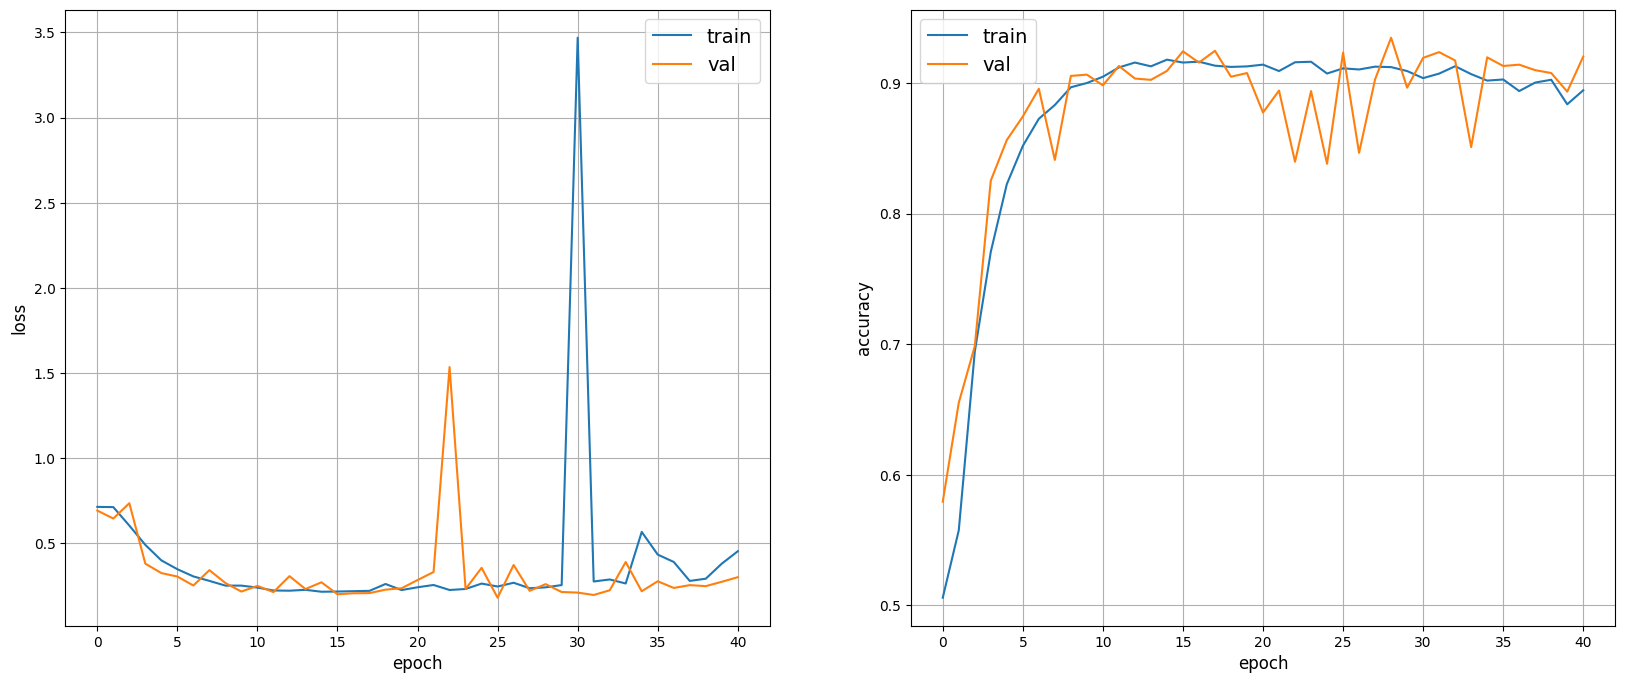

156/156 [==============================] - 1s 3ms/step - loss: 0.1815 - binary_accuracy: 0.9232
Test loss and accuracy: [0.1814616173505783, 0.9232465028762817]


In [ ]:
epoch = 50 #RMSPROP

drop512 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

drop512.compile(optimizer = RMSProp, loss=loss, metrics=['binary_accuracy'])

history = drop512.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping3])

performance_plot(history)

result = drop512.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)

Epoch 1/50
312/312 [==============================] - 21s 36ms/step - loss: 0.6952 - binary_accuracy: 0.5001 - val_loss: 0.6932 - val_binary_accuracy: 0.4970
Epoch 2/50
312/312 [==============================] - 10s 31ms/step - loss: 0.6933 - binary_accuracy: 0.5006 - val_loss: 0.6932 - val_binary_accuracy: 0.4970
Epoch 3/50
312/312 [==============================] - 10s 31ms/step - loss: 0.6936 - binary_accuracy: 0.4977 - val_loss: 0.6931 - val_binary_accuracy: 0.5034
Epoch 4/50
312/312 [==============================] - 10s 33ms/step - loss: 0.6934 - binary_accuracy: 0.5073 - val_loss: 0.6928 - val_binary_accuracy: 0.5371
Epoch 5/50
312/312 [==============================] - 10s 31ms/step - loss: 0.6935 - binary_accuracy: 0.5075 - val_loss: 0.6899 - val_binary_accuracy: 0.5218
Epoch 6/50
312/312 [==============================] - 10s 31ms/step - loss: 0.6930 - binary_accuracy: 0.5052 - val_loss: 0.6929 - val_binary_accuracy: 0.5259
Epoch 7/50
312/312 [==============================] 

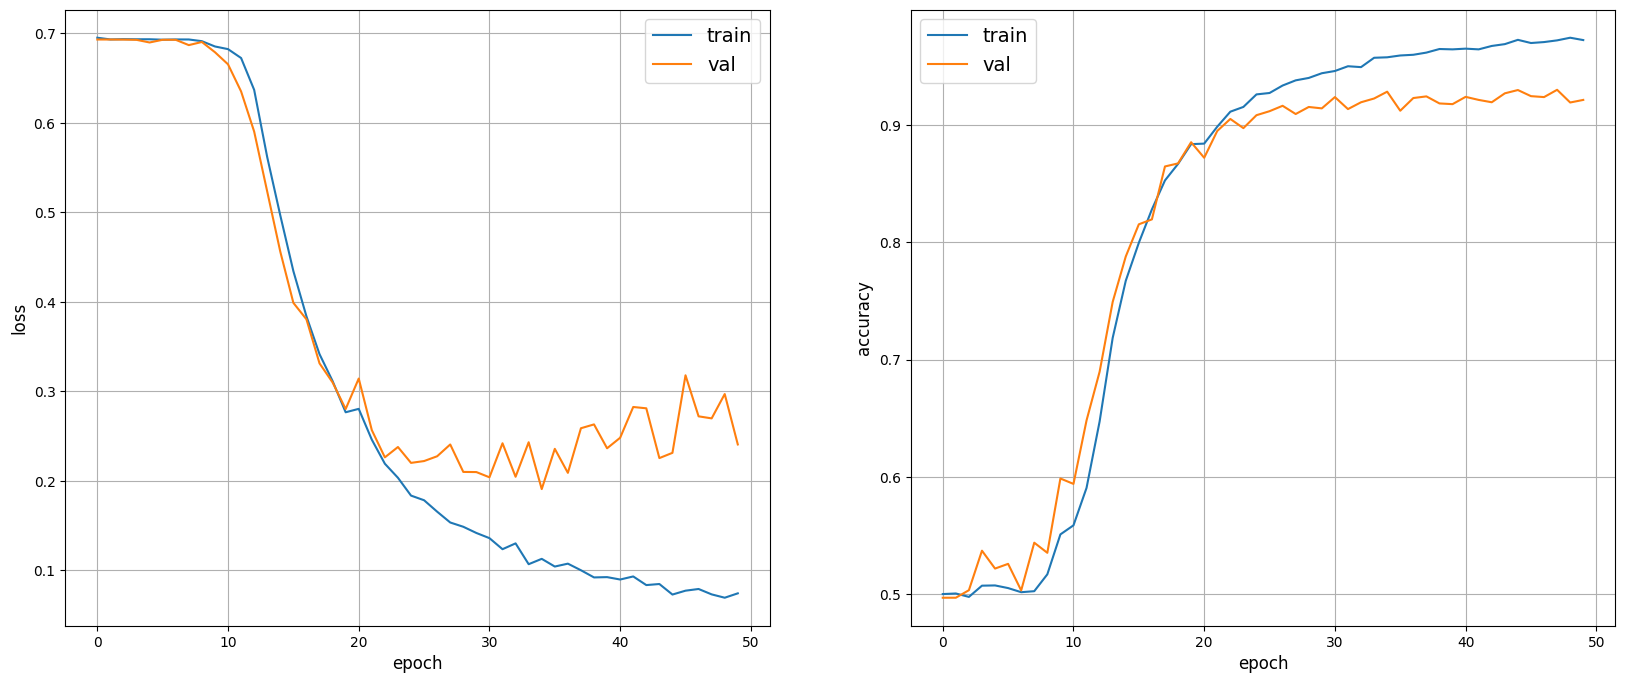

156/156 [==============================] - 1s 7ms/step - loss: 0.1908 - binary_accuracy: 0.9283
Test loss and accuracy: [0.19079527258872986, 0.9282565116882324]


In [ ]:
epoch = 50 #ADAM

drop512 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

drop512.compile(optimizer = ADAM, loss=loss, metrics=['binary_accuracy'])

history = drop512.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test), callbacks=[earlystopping3])

performance_plot(history)

result = drop512.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)



*    ***DropBatch256: model using dropout and batch normalization layers and convolutional layers with 32, 64, 128, 256 kernels, 2 Optimizers***



Epoch 1/50
312/312 [==============================] - 33s 69ms/step - loss: 0.7632 - binary_accuracy: 0.5936 - val_loss: 7.0917 - val_binary_accuracy: 0.5002
Epoch 2/50
312/312 [==============================] - 19s 62ms/step - loss: 0.5631 - binary_accuracy: 0.7141 - val_loss: 0.6591 - val_binary_accuracy: 0.6972
Epoch 3/50
312/312 [==============================] - 19s 62ms/step - loss: 0.4399 - binary_accuracy: 0.8009 - val_loss: 0.4302 - val_binary_accuracy: 0.8068
Epoch 4/50
312/312 [==============================] - 20s 64ms/step - loss: 0.3634 - binary_accuracy: 0.8417 - val_loss: 0.4194 - val_binary_accuracy: 0.8096
Epoch 5/50
312/312 [==============================] - 20s 63ms/step - loss: 0.3005 - binary_accuracy: 0.8697 - val_loss: 0.2634 - val_binary_accuracy: 0.8938
Epoch 6/50
312/312 [==============================] - 20s 63ms/step - loss: 0.2602 - binary_accuracy: 0.8924 - val_loss: 0.2702 - val_binary_accuracy: 0.8952
Epoch 7/50
312/312 [==============================] 

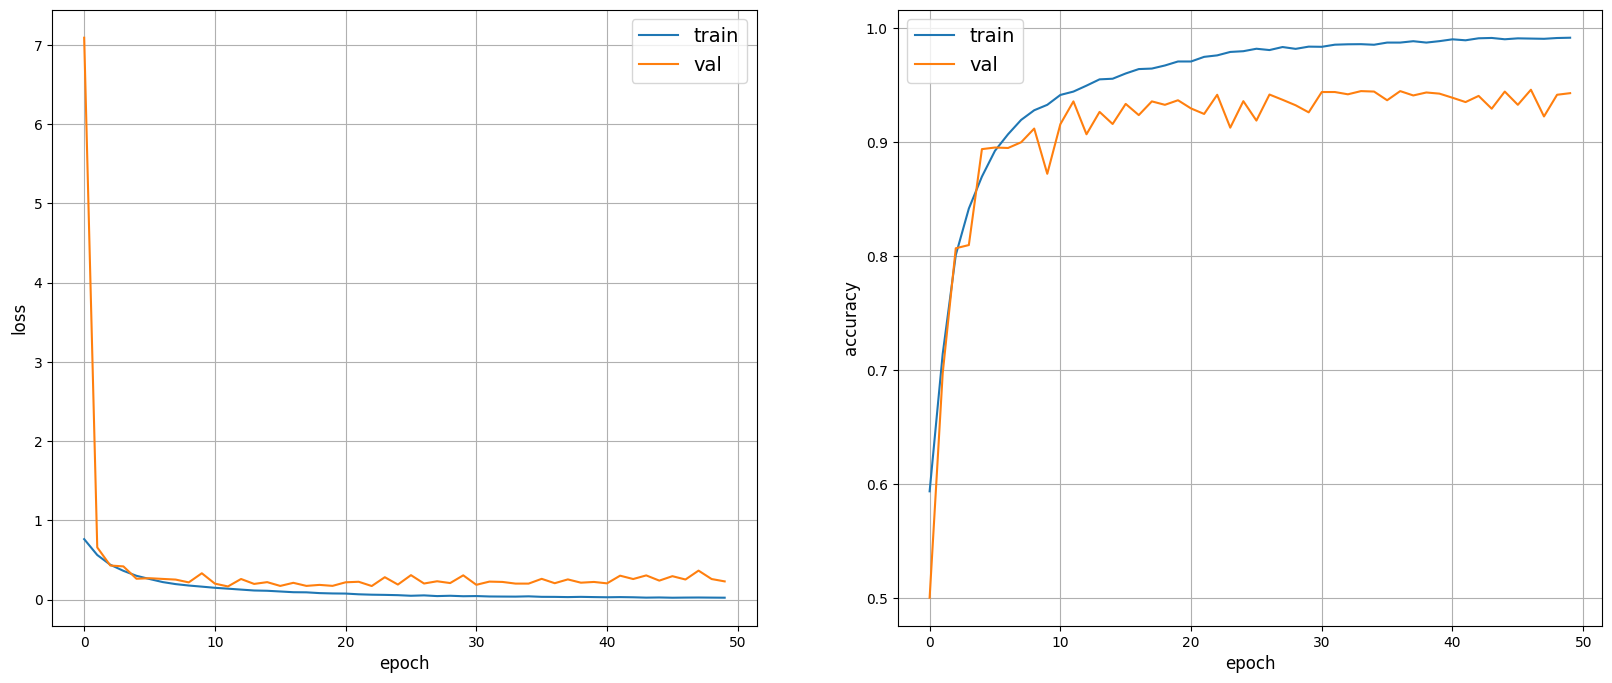

156/156 [==============================] - 2s 10ms/step - loss: 0.2300 - binary_accuracy: 0.9429
Test loss and accuracy: [0.23002095520496368, 0.9428857564926147]


In [ ]:
epoch = 50  #RMSPROP

dropbatch256 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

dropbatch256.compile(optimizer = RMSProp, loss=loss, metrics=['binary_accuracy'])

history = dropbatch256.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result = dropbatch256 .evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)

Epoch 1/50
312/312 [==============================] - 21s 61ms/step - loss: 0.7039 - binary_accuracy: 0.6445 - val_loss: 0.6699 - val_binary_accuracy: 0.5894
Epoch 2/50
312/312 [==============================] - 18s 59ms/step - loss: 0.5046 - binary_accuracy: 0.7577 - val_loss: 0.8377 - val_binary_accuracy: 0.5772
Epoch 3/50
312/312 [==============================] - 20s 63ms/step - loss: 0.4002 - binary_accuracy: 0.8193 - val_loss: 0.5409 - val_binary_accuracy: 0.7443
Epoch 4/50
312/312 [==============================] - 18s 59ms/step - loss: 0.3250 - binary_accuracy: 0.8565 - val_loss: 0.4209 - val_binary_accuracy: 0.8048
Epoch 5/50
312/312 [==============================] - 18s 58ms/step - loss: 0.2618 - binary_accuracy: 0.8905 - val_loss: 0.4040 - val_binary_accuracy: 0.8349
Epoch 6/50
312/312 [==============================] - 19s 62ms/step - loss: 0.2248 - binary_accuracy: 0.9056 - val_loss: 0.2771 - val_binary_accuracy: 0.8848
Epoch 7/50
312/312 [==============================] 

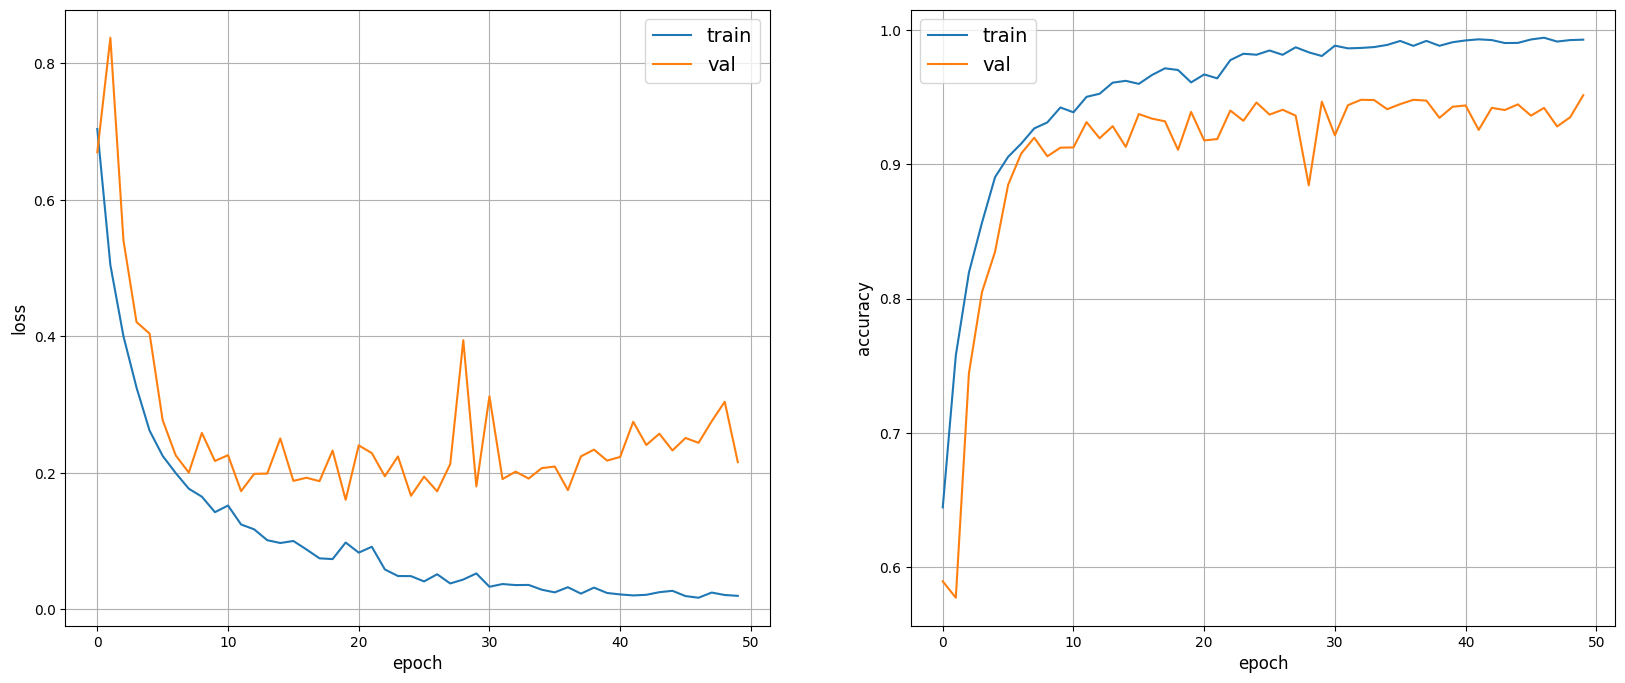

156/156 [==============================] - 1s 8ms/step - loss: 0.2157 - binary_accuracy: 0.9515
Test loss and accuracy: [0.21567654609680176, 0.9515029788017273]


In [ ]:
epoch = 50  #ADAM

dropbatch256 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

dropbatch256 .compile(optimizer = ADAM, loss=loss, metrics=['binary_accuracy'])

history = dropbatch256.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result = dropbatch256.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)



*   ***DropBatch512: model using dropout and batch normalization layers and convolutional layers with 32, 64, 128, 256,512 kernels, 2 Optimizers***




Epoch 1/50
312/312 [==============================] - 14s 34ms/step - loss: 0.7954 - binary_accuracy: 0.5414 - val_loss: 0.7704 - val_binary_accuracy: 0.5032
Epoch 2/50
312/312 [==============================] - 10s 33ms/step - loss: 0.6615 - binary_accuracy: 0.6186 - val_loss: 1.1803 - val_binary_accuracy: 0.6014
Epoch 3/50
312/312 [==============================] - 10s 33ms/step - loss: 0.4975 - binary_accuracy: 0.7643 - val_loss: 0.7850 - val_binary_accuracy: 0.6828
Epoch 4/50
312/312 [==============================] - 10s 33ms/step - loss: 0.3827 - binary_accuracy: 0.8314 - val_loss: 0.4124 - val_binary_accuracy: 0.8122
Epoch 5/50
312/312 [==============================] - 10s 33ms/step - loss: 0.3098 - binary_accuracy: 0.8690 - val_loss: 0.3186 - val_binary_accuracy: 0.8659
Epoch 6/50
312/312 [==============================] - 10s 33ms/step - loss: 0.2640 - binary_accuracy: 0.8897 - val_loss: 0.3215 - val_binary_accuracy: 0.8685
Epoch 7/50
312/312 [==============================] 

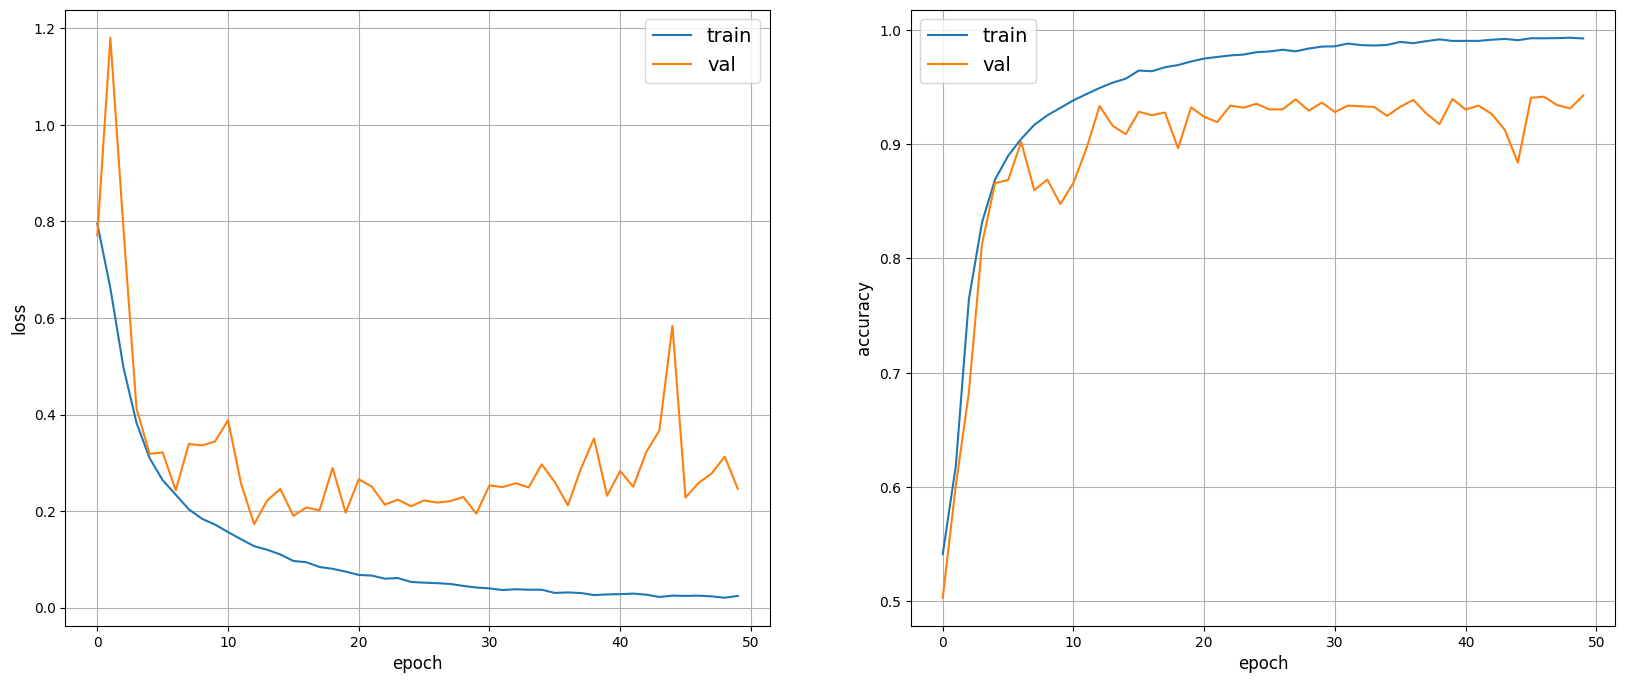

156/156 [==============================] - 1s 5ms/step - loss: 0.2460 - binary_accuracy: 0.9425
Test loss and accuracy: [0.246037557721138, 0.942484974861145]


In [ ]:
epoch = 50  #RMSPROP


dropbatch512 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


dropbatch512.compile(optimizer = RMSProp, loss=loss, metrics=['binary_accuracy'])

history = dropbatch512.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result = dropbatch512.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)

Epoch 1/50
312/312 [==============================] - 12s 33ms/step - loss: 0.7072 - binary_accuracy: 0.5947 - val_loss: 0.7254 - val_binary_accuracy: 0.4914
Epoch 2/50
312/312 [==============================] - 10s 32ms/step - loss: 0.5919 - binary_accuracy: 0.6855 - val_loss: 0.6015 - val_binary_accuracy: 0.6721
Epoch 3/50
312/312 [==============================] - 10s 32ms/step - loss: 0.5039 - binary_accuracy: 0.7555 - val_loss: 0.5732 - val_binary_accuracy: 0.7222
Epoch 4/50
312/312 [==============================] - 10s 31ms/step - loss: 0.4329 - binary_accuracy: 0.7971 - val_loss: 0.4921 - val_binary_accuracy: 0.7844
Epoch 5/50
312/312 [==============================] - 10s 32ms/step - loss: 0.3695 - binary_accuracy: 0.8366 - val_loss: 0.4635 - val_binary_accuracy: 0.7904
Epoch 6/50
312/312 [==============================] - 10s 32ms/step - loss: 0.3132 - binary_accuracy: 0.8655 - val_loss: 0.4000 - val_binary_accuracy: 0.8389
Epoch 7/50
312/312 [==============================] 

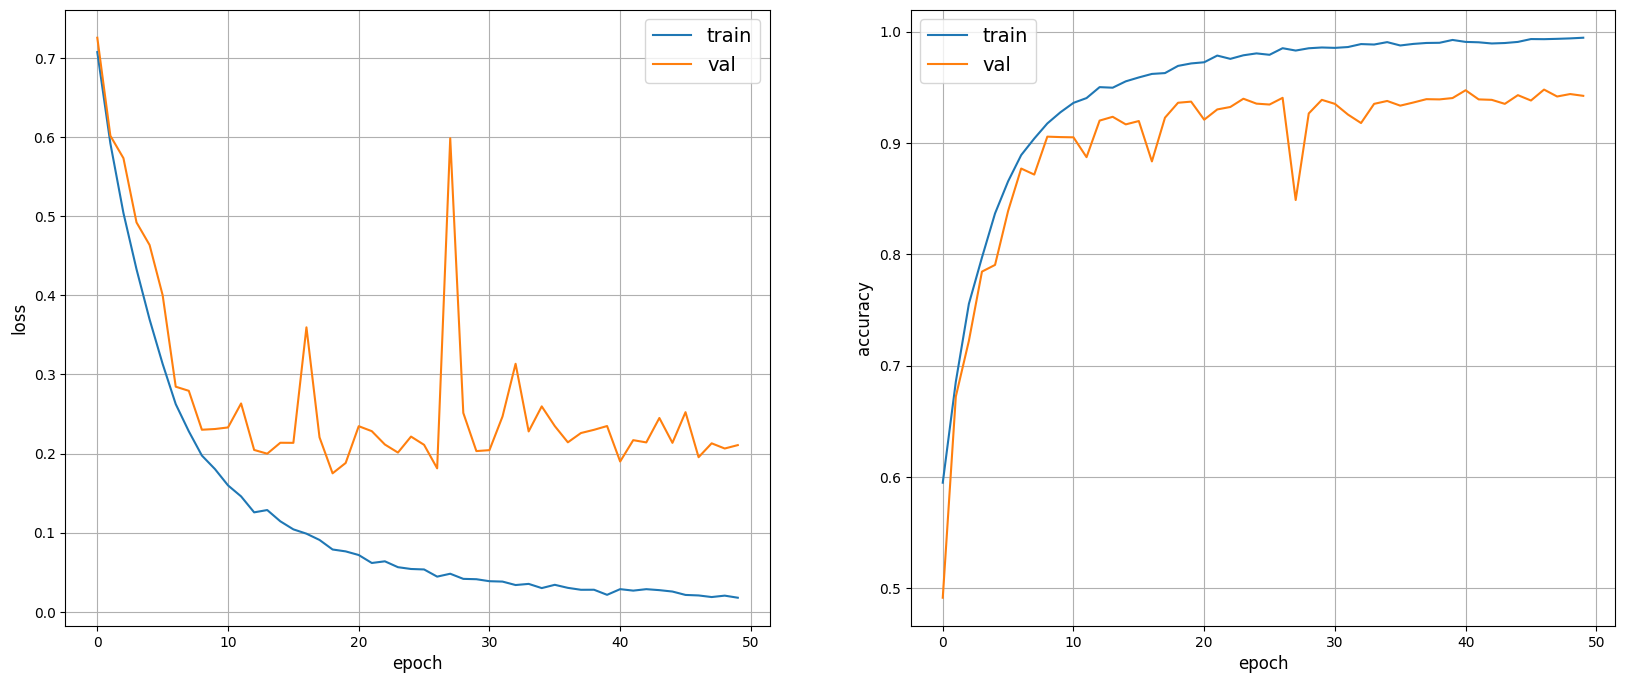

156/156 [==============================] - 1s 5ms/step - loss: 0.2107 - binary_accuracy: 0.9423
Test loss and accuracy: [0.21066145598888397, 0.9422845840454102]


In [ ]:
epoch = 50  #ADAM


dropbatch512 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])



dropbatch512.compile(optimizer = ADAM, loss=loss, metrics=['binary_accuracy'])

history = dropbatch512.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result = dropbatch512.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)



*  ***DropBatch1024: model using dropout and batch normalization layers and convolutional layers with 32, 64, 128, 256,512, 1024 kernels, 2 Optimizers***


Epoch 1/50
312/312 [==============================] - 16s 39ms/step - loss: 0.8194 - binary_accuracy: 0.5178 - val_loss: 0.8961 - val_binary_accuracy: 0.4946
Epoch 2/50
312/312 [==============================] - 12s 38ms/step - loss: 0.7183 - binary_accuracy: 0.5559 - val_loss: 1.9050 - val_binary_accuracy: 0.5343
Epoch 3/50
312/312 [==============================] - 12s 38ms/step - loss: 0.6554 - binary_accuracy: 0.6355 - val_loss: 0.6304 - val_binary_accuracy: 0.6575
Epoch 4/50
312/312 [==============================] - 12s 38ms/step - loss: 0.5849 - binary_accuracy: 0.7023 - val_loss: 0.7819 - val_binary_accuracy: 0.6701
Epoch 5/50
312/312 [==============================] - 12s 38ms/step - loss: 0.5047 - binary_accuracy: 0.7619 - val_loss: 0.5044 - val_binary_accuracy: 0.7772
Epoch 6/50
312/312 [==============================] - 12s 38ms/step - loss: 0.4135 - binary_accuracy: 0.8146 - val_loss: 0.6160 - val_binary_accuracy: 0.7810
Epoch 7/50
312/312 [==============================] 

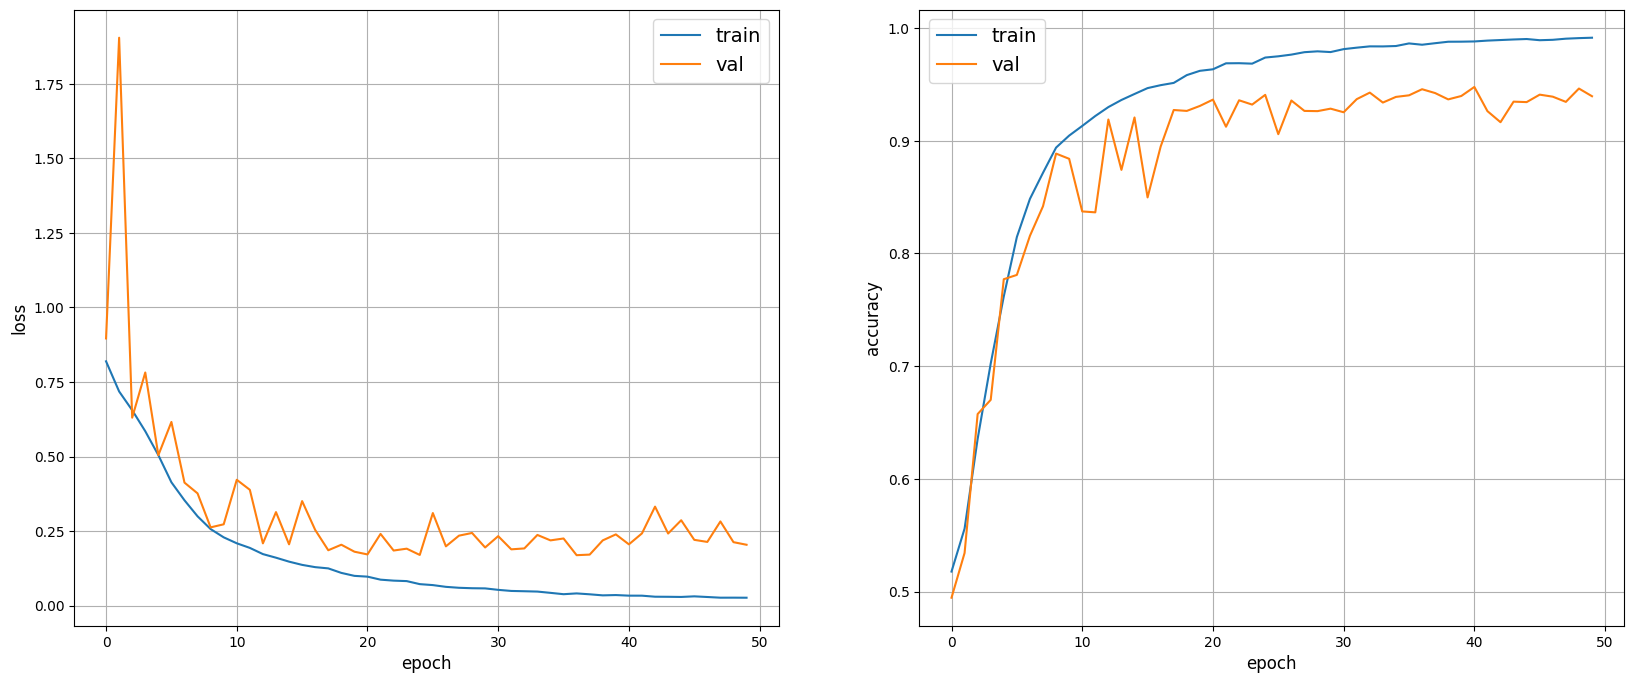

156/156 [==============================] - 1s 6ms/step - loss: 0.2039 - binary_accuracy: 0.9395
Test loss and accuracy: [0.20393824577331543, 0.9394789338111877]


In [ ]:
epoch = 50 #RMSPROP


dropbatch1024 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


dropbatch1024.compile(optimizer = RMSProp, loss=loss, metrics=['binary_accuracy'])

history = dropbatch1024.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result = dropbatch1024.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)

Epoch 1/50
312/312 [==============================] - 14s 37ms/step - loss: 0.7215 - binary_accuracy: 0.5695 - val_loss: 0.6890 - val_binary_accuracy: 0.5691
Epoch 2/50
312/312 [==============================] - 11s 35ms/step - loss: 0.6265 - binary_accuracy: 0.6570 - val_loss: 0.6337 - val_binary_accuracy: 0.6501
Epoch 3/50
312/312 [==============================] - 11s 35ms/step - loss: 0.5812 - binary_accuracy: 0.6974 - val_loss: 0.7301 - val_binary_accuracy: 0.6445
Epoch 4/50
312/312 [==============================] - 11s 35ms/step - loss: 0.5237 - binary_accuracy: 0.7429 - val_loss: 0.6121 - val_binary_accuracy: 0.6974
Epoch 5/50
312/312 [==============================] - 11s 35ms/step - loss: 0.4730 - binary_accuracy: 0.7793 - val_loss: 0.6603 - val_binary_accuracy: 0.6766
Epoch 6/50
312/312 [==============================] - 11s 35ms/step - loss: 0.4210 - binary_accuracy: 0.8077 - val_loss: 0.5330 - val_binary_accuracy: 0.7421
Epoch 7/50
312/312 [==============================] 

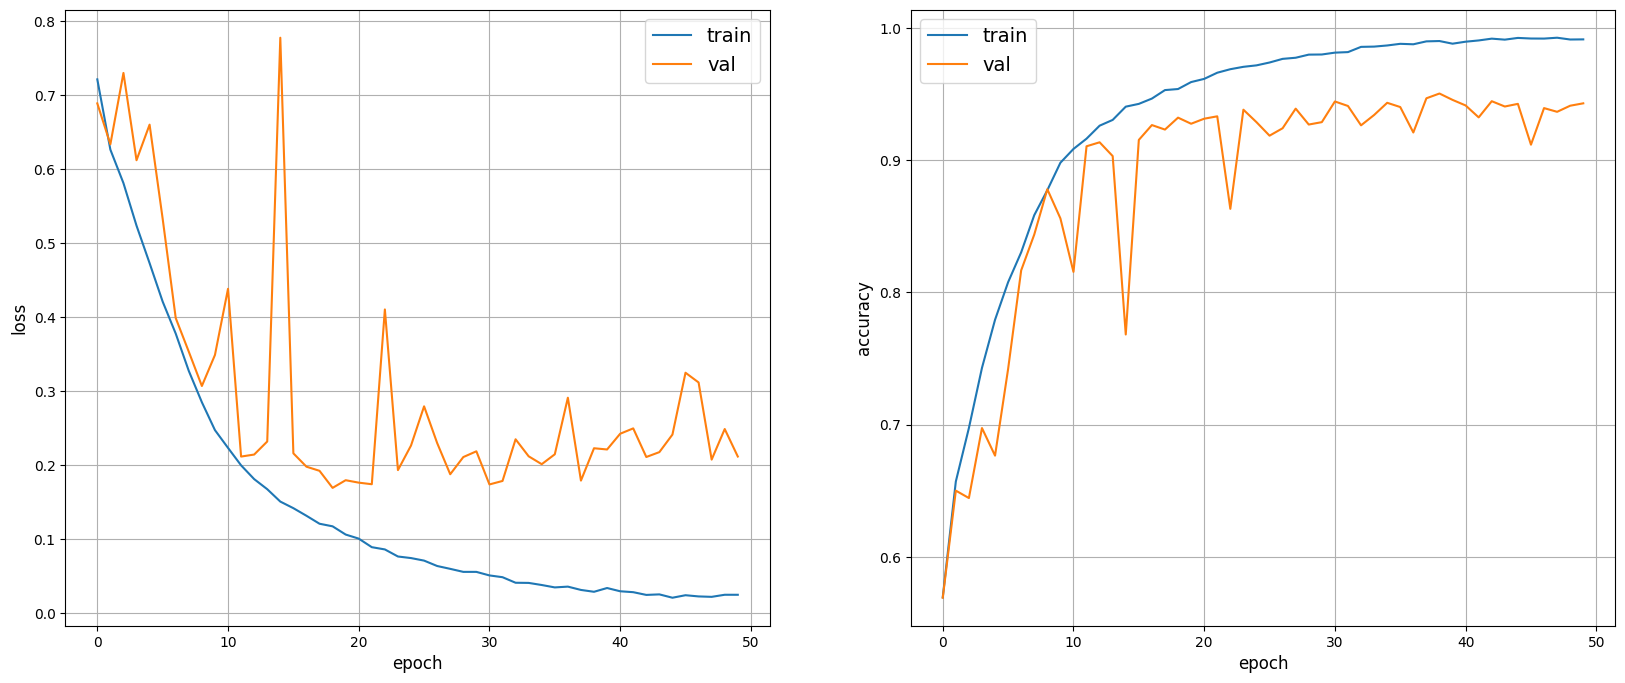

156/156 [==============================] - 1s 6ms/step - loss: 0.2115 - binary_accuracy: 0.9429
Test loss and accuracy: [0.21149946749210358, 0.9428857564926147]


In [ ]:
epoch = 50 #ADAM


dropbatch1024 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


dropbatch1024.compile(optimizer = ADAM, loss=loss, metrics=['binary_accuracy'])

history = dropbatch1024.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result = dropbatch1024.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)



*   ***DropBatchMod1024: model using dropout and batch normalization layers and convolutional layers with 32, 64, 128, 256, 512, 1024 kernels, 2 Optimizers, Modified structure***



Epoch 1/50
312/312 [==============================] - 14s 36ms/step - loss: 0.8533 - binary_accuracy: 0.5565 - val_loss: 3.8830 - val_binary_accuracy: 0.5046
Epoch 2/50
312/312 [==============================] - 11s 35ms/step - loss: 0.6487 - binary_accuracy: 0.6163 - val_loss: 0.7604 - val_binary_accuracy: 0.5246
Epoch 3/50
312/312 [==============================] - 11s 35ms/step - loss: 0.6193 - binary_accuracy: 0.6561 - val_loss: 0.7612 - val_binary_accuracy: 0.5138
Epoch 4/50
312/312 [==============================] - 11s 35ms/step - loss: 0.5787 - binary_accuracy: 0.6971 - val_loss: 0.7593 - val_binary_accuracy: 0.6168
Epoch 5/50
312/312 [==============================] - 11s 35ms/step - loss: 0.5205 - binary_accuracy: 0.7419 - val_loss: 0.9783 - val_binary_accuracy: 0.5772
Epoch 6/50
312/312 [==============================] - 11s 35ms/step - loss: 0.4654 - binary_accuracy: 0.7788 - val_loss: 0.5746 - val_binary_accuracy: 0.7176
Epoch 7/50
312/312 [==============================] 

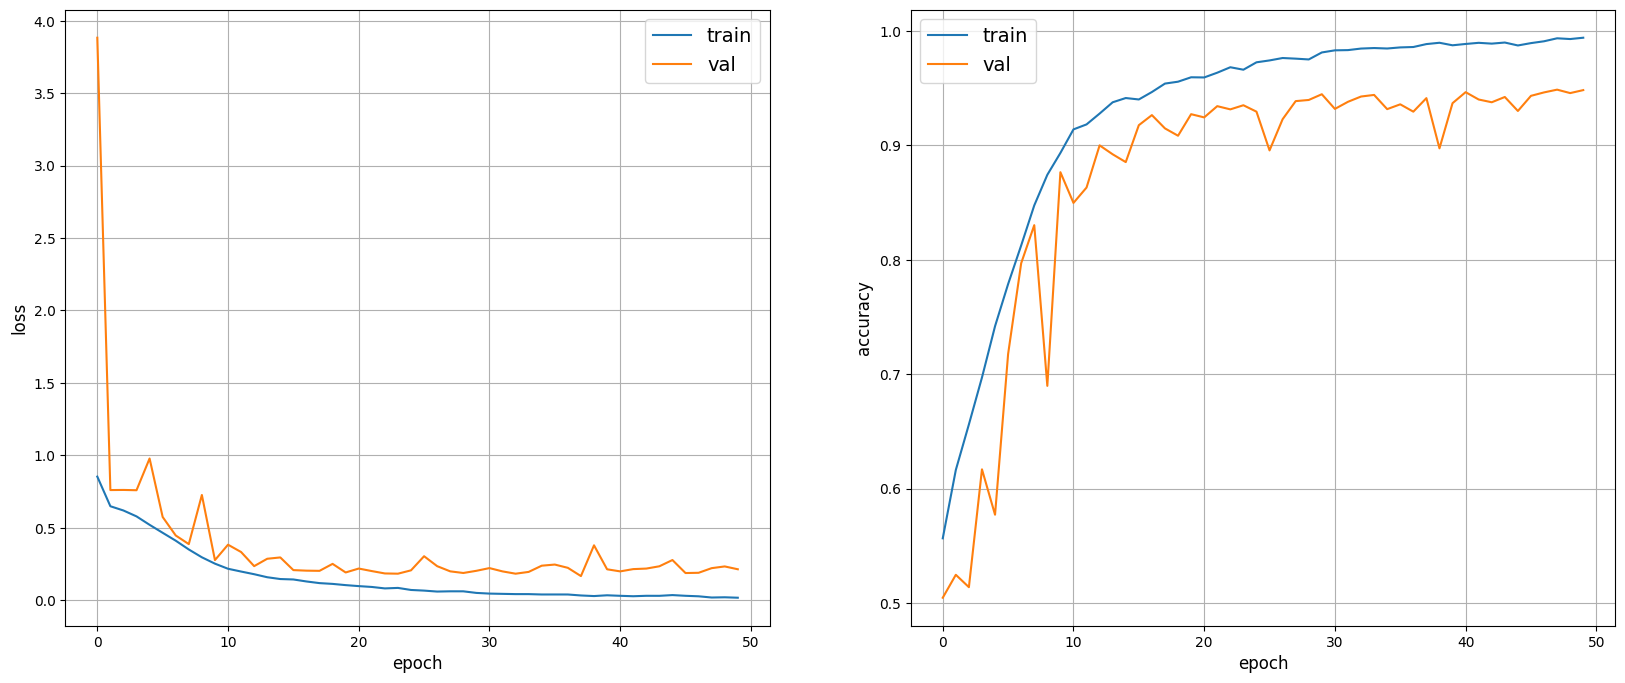

156/156 [==============================] - 1s 6ms/step - loss: 0.2136 - binary_accuracy: 0.9483
Test loss and accuracy: [0.213645339012146, 0.9482966065406799]


In [ ]:
epoch = 50 #RMSPROP


dropbatchmod1024 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


dropbatchmod1024.compile(optimizer = ADAM, loss=loss, metrics=['binary_accuracy'])

history = dropbatchmod1024.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result = dropbatchmod1024.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)

Epoch 1/50
312/312 [==============================] - 15s 39ms/step - loss: 0.9178 - binary_accuracy: 0.5177 - val_loss: 1.2230 - val_binary_accuracy: 0.5080
Epoch 2/50
312/312 [==============================] - 12s 38ms/step - loss: 0.6762 - binary_accuracy: 0.5656 - val_loss: 1.9695 - val_binary_accuracy: 0.5495
Epoch 3/50
312/312 [==============================] - 12s 37ms/step - loss: 0.5888 - binary_accuracy: 0.6877 - val_loss: 1.0709 - val_binary_accuracy: 0.6078
Epoch 4/50
312/312 [==============================] - 12s 37ms/step - loss: 0.4904 - binary_accuracy: 0.7635 - val_loss: 0.5993 - val_binary_accuracy: 0.7669
Epoch 5/50
312/312 [==============================] - 12s 38ms/step - loss: 0.4021 - binary_accuracy: 0.8207 - val_loss: 0.5524 - val_binary_accuracy: 0.7794
Epoch 6/50
312/312 [==============================] - 12s 37ms/step - loss: 0.3427 - binary_accuracy: 0.8502 - val_loss: 0.4312 - val_binary_accuracy: 0.8144
Epoch 7/50
312/312 [==============================] 

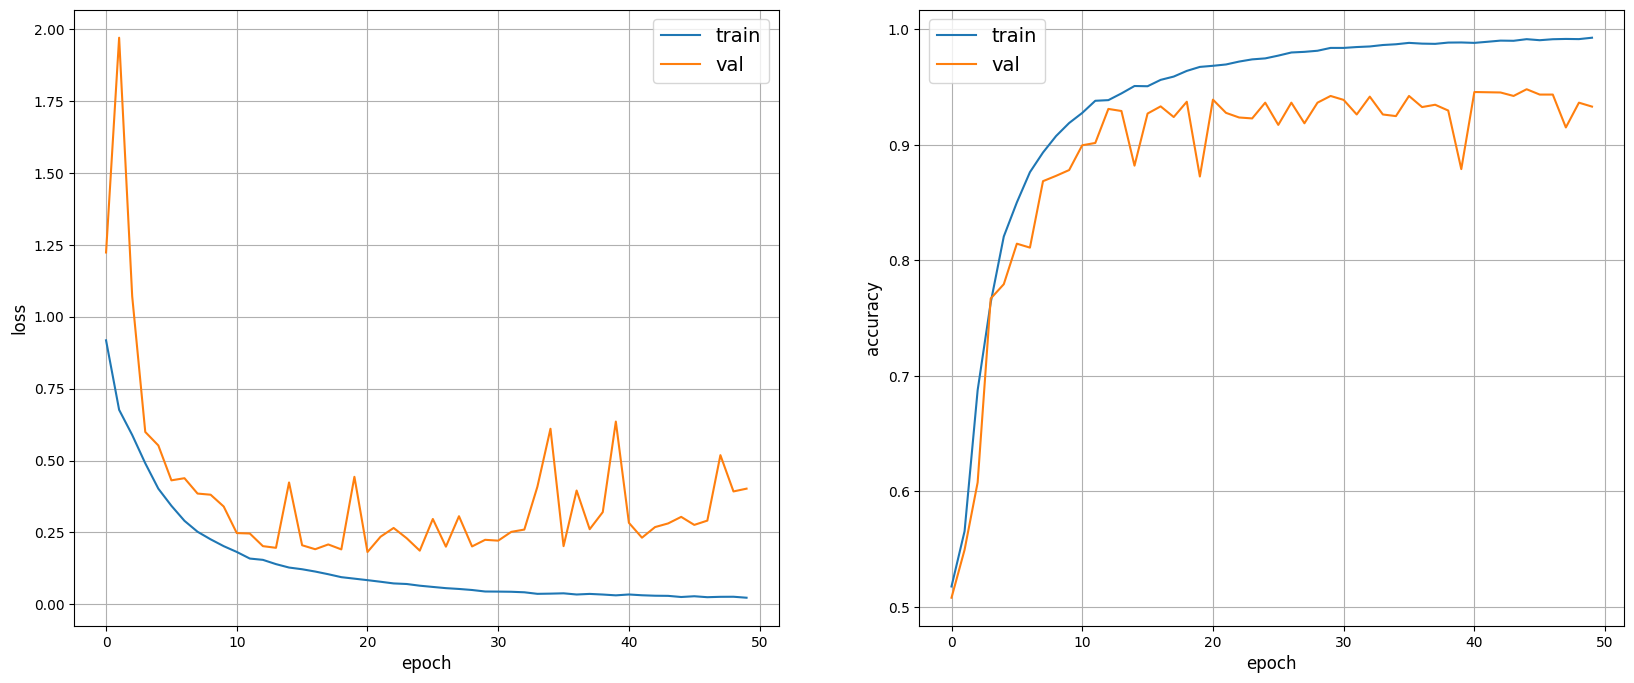

156/156 [==============================] - 1s 6ms/step - loss: 0.4022 - binary_accuracy: 0.9331
Test loss and accuracy: [0.4022010862827301, 0.9330661296844482]


In [ ]:
epoch = 50 #ADAM


dropbatchmod1024 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, use_bias=False, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


dropbatchmod1024.compile(optimizer = RMSProp, loss=loss, metrics=['binary_accuracy'])

history = dropbatchmod1024.fit(X_train, y_train, epochs = epoch, batch_size = 64, verbose = 1, validation_data = (X_test, y_test))

performance_plot(history)

result = dropbatchmod1024.evaluate(X_test, y_test)
print(f"Test loss and accuracy:", result)